In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the combined dataset
df_combined = pd.read_csv('combined_data.csv')

In [3]:
df_combined.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [4]:
# See what types of variables are present
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595137 entries, 0 to 14595136
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

In [5]:
df_combined.shape

(14595137, 29)

In [6]:
# Drop unnecessary columns
df_combined.drop(df_combined.columns[[8,9,10,16,17,21,22,23]], axis=1, inplace=True)

# Check the sum of null values in each column
df_combined.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              282682
CRSDepTime                0
ArrTime              316047
CRSArrTime                0
ActualElapsedTime    316047
CRSElapsedTime          998
AirTime              316047
ArrDelay             316047
DepDelay             282682
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [7]:
# Remove missing values
df_final = df_combined.dropna()

In [8]:
df_final.shape

(14279090, 21)

## Feature selection

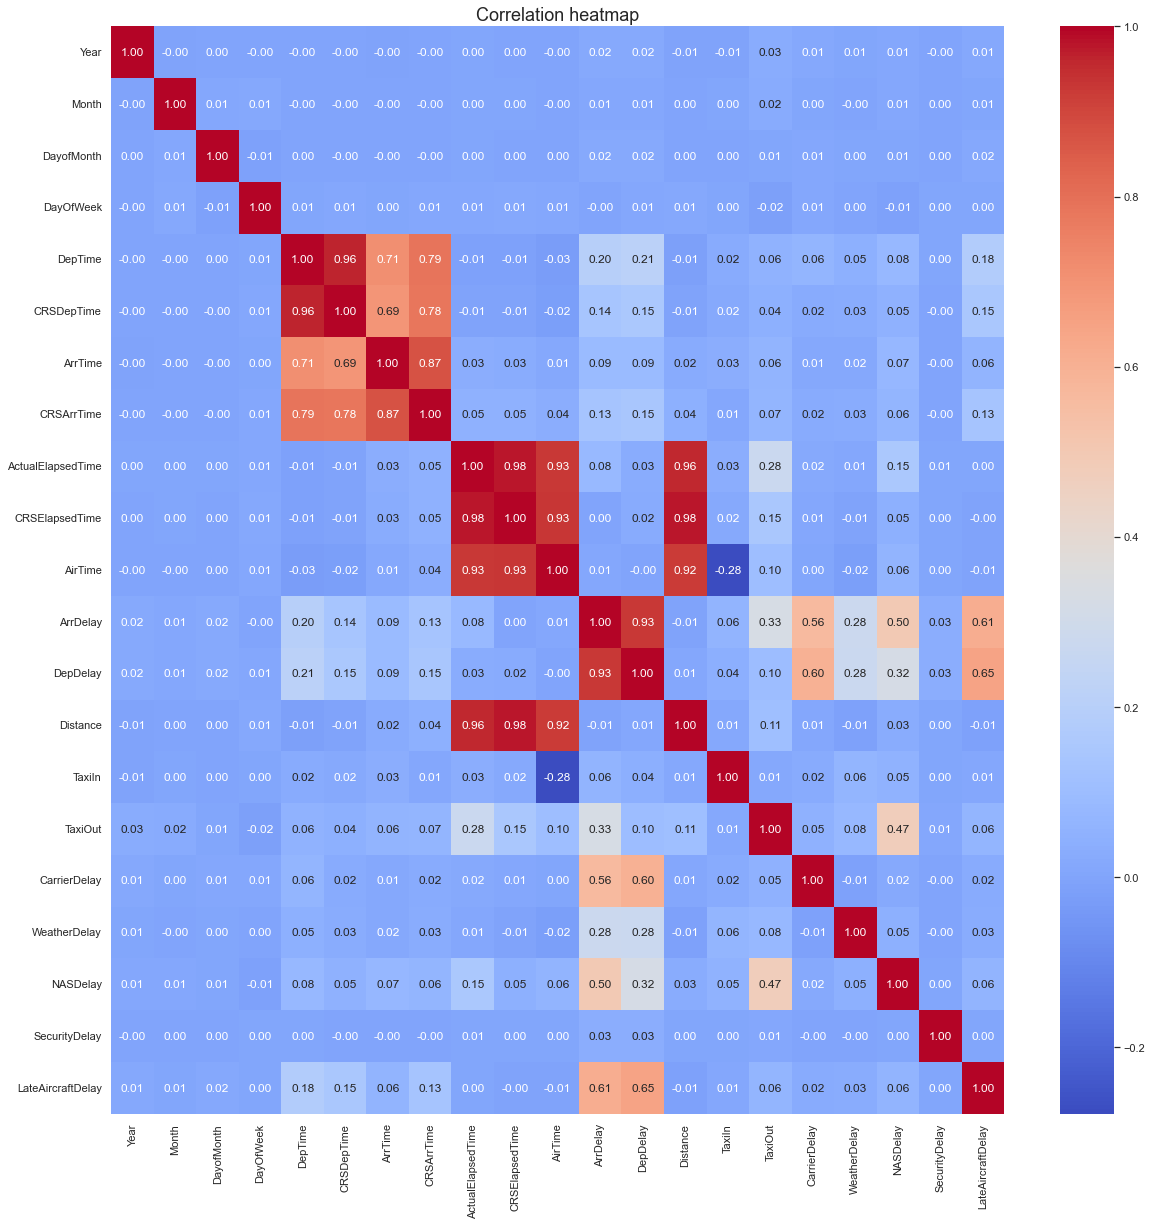

In [9]:
# Plot correlation heatmap

sns.set(rc={"figure.figsize":(20, 20)})
heatmap = sns.heatmap(df_final.corr(), cmap="coolwarm", annot=True,  fmt = '.2f')
heatmap.set_title('Correlation heatmap', fontsize = 18)
heatmap.fontsize = 15

In [10]:
# Create new boolean column based on value in ArrDelay column. If ArrDelay > 15, 1 is assigned else 0 is assigned
df_final['Arrival_Delayed'] = np.where(df_final['ArrDelay'] > 15, 1, 0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5556\2296799300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Arrival_Delayed'] = np.where(df_final['ArrDelay'] > 15, 1, 0)


In [11]:
df_final['Arrival_Delayed']

0           0
1           0
2           0
3           0
4           0
           ..
14595132    0
14595133    0
14595134    0
14595135    1
14595136    1
Name: Arrival_Delayed, Length: 14279090, dtype: int32

In [12]:
# Check the class balance
df_final["Arrival_Delayed"].value_counts()

0    10995706
1     3283384
Name: Arrival_Delayed, dtype: int64

As you can see the classes seem to have imbalances. Accuracy will not be considered as a metric due to this.

In [13]:
# Seperate the features and target (We are going to predict if there is an arrival delay or not)
feature_columns = ['Month', 'DayOfWeek', 'CRSDepTime', 'DepDelay', 'TaxiOut']
X = df_final[feature_columns] # Features
y = df_final.Arrival_Delayed # Target variable

## Splitting data and scaling

In [14]:
# Import required modules

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
# Scaling the dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model development and prediction

In [17]:
# Run the model using the default parameters
log_reg = LogisticRegression(random_state=0)

# Fit the model with data
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

## Model evaluation

In [19]:
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix

array([[2689336,  199840],
       [  58806,  621791]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

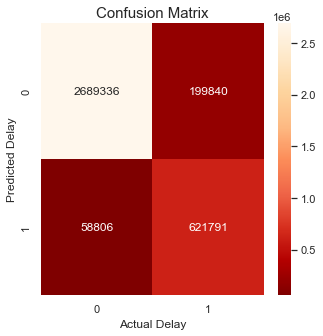

In [20]:
# Confusion matrix heatmap

sns.set(rc={"figure.figsize":(5, 5)})
plot = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="OrRd_r", fmt = 'd')
plot.set_xlabel('Actual Delay')
plot.set_ylabel('Predicted Delay')
plot.set_title('Confusion Matrix', fontsize = 15)

In [21]:
# Classification report

from sklearn.metrics import classification_report
target_names = ['Not Delayed', 'Delayed']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.93      0.98      0.95   2748142
     Delayed       0.91      0.76      0.83    821631

    accuracy                           0.93   3569773
   macro avg       0.92      0.87      0.89   3569773
weighted avg       0.93      0.93      0.93   3569773



In [24]:
# f1-score is pretty high (0.95 and 0.83) which is good

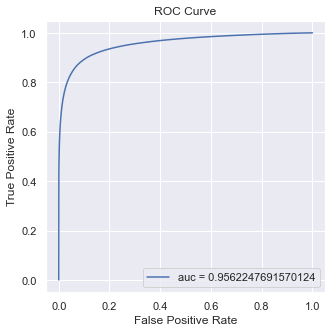

In [22]:
# ROC curve

y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "auc = " + str(auc))
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

AUC is very high (0.956) therefore model is a good fit to predict arrival delays